In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-10-03 10:54:04,779 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
ri = Roach2Baseband()

INFO     2016-10-03 10:54:06,236 - kid_readout.roach.interface.initialize:436  Loaded ROACH state from /data/readout/r2kid_config.npz


In [4]:
ri.set_loopback(False)
ri.set_fft_gain(4)

INFO     2016-10-03 10:54:06,855 - kid_readout.roach.interface.set_fft_gain:309  Set FFT gain integer to 4.


In [5]:
frqs=ri.set_tone_freqs(np.linspace(10,250,512),nsamp=2**18)

In [6]:
ri.set_dac_atten(20)

INFO     2016-10-03 10:54:09,688 - kid_readout.roach.interface.set_dac_attenuator:645  Set DAC attenuator to 20.0 dB.


In [7]:
x,y = ri.get_raw_adc()

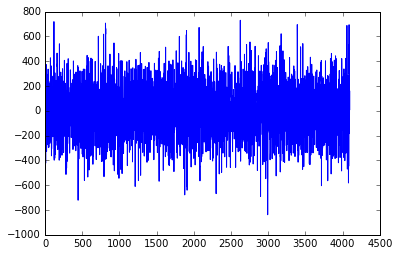

In [8]:
plot(x)

In [43]:
x.std()

207.86854902891039

In [44]:
x.ptp()

1628.0

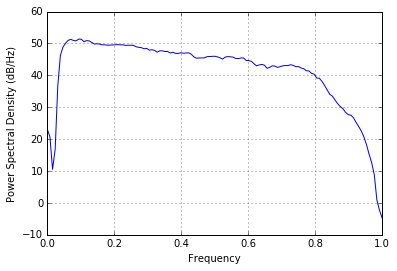

In [45]:
_=psd(x)

In [9]:
d,a = ri.get_data_udp(1024,demod=True)

In [10]:
ssa = ri.get_measurement(1,demod=True)

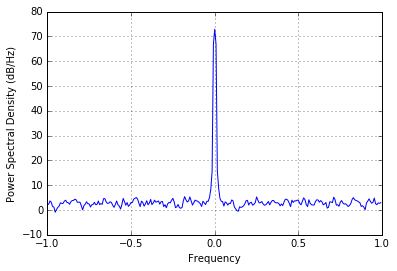

In [11]:
_=psd(ssa.s21_raw[3,:])

In [44]:
frqs=ri.set_tone_freqs(np.linspace(10,250,512)[None,:]+np.arange(30,dtype='int')[:,None]*512./2.**15+512./2**16,nsamp=2**16)


In [48]:
512e6/2**16

7812.5

In [45]:
ssas = []
for bank in range(30):
    ri.select_bank(bank)
    ri.select_fft_bins(range(512))
    ssa = ri.get_measurement(0.1)
    ssas.append(ssa)
    

In [41]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [59]:
ri.set_dac_atten(40)

INFO     2016-10-03 11:24:26,503 - kid_readout.roach.interface.set_dac_attenuator:645  Set DAC attenuator to 40.0 dB.


In [2]:
import numpy as np

In [6]:
np.linspace(110,170,128)

array([ 110.        ,  110.47244094,  110.94488189,  111.41732283,
        111.88976378,  112.36220472,  112.83464567,  113.30708661,
        113.77952756,  114.2519685 ,  114.72440945,  115.19685039,
        115.66929134,  116.14173228,  116.61417323,  117.08661417,
        117.55905512,  118.03149606,  118.50393701,  118.97637795,
        119.4488189 ,  119.92125984,  120.39370079,  120.86614173,
        121.33858268,  121.81102362,  122.28346457,  122.75590551,
        123.22834646,  123.7007874 ,  124.17322835,  124.64566929,
        125.11811024,  125.59055118,  126.06299213,  126.53543307,
        127.00787402,  127.48031496,  127.95275591,  128.42519685,
        128.8976378 ,  129.37007874,  129.84251969,  130.31496063,
        130.78740157,  131.25984252,  131.73228346,  132.20472441,
        132.67716535,  133.1496063 ,  133.62204724,  134.09448819,
        134.56692913,  135.03937008,  135.51181102,  135.98425197,
        136.45669291,  136.92913386,  137.4015748 ,  137.87401

In [62]:
sa = acquire.run_sweep(ri,np.linspace(10,250,512)[None,:]+np.arange(30,dtype='int')[:,None]*512./2.**15,2**15,verbose=True,length_seconds=.5)

Measuring bank
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29


<IPython.core.display.Javascript object>


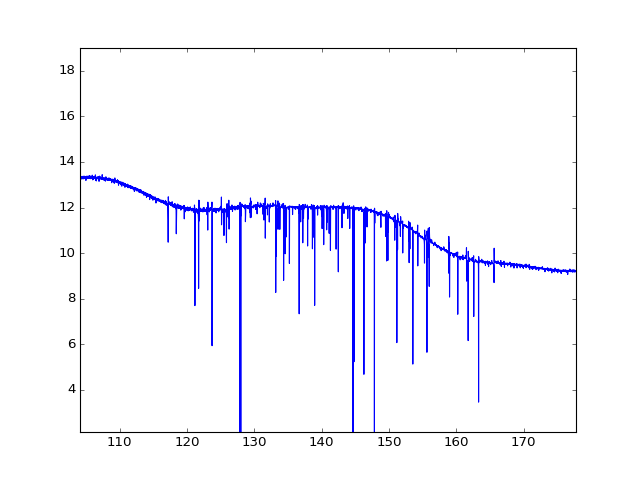

In [63]:
figure()
plot(sa.frequency_MHz,dB(sa.s21_point))

In [27]:
ri.tone_bins.shape

(1, 512)

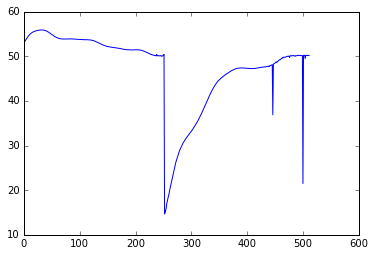

In [49]:
plot(dB(np.abs(d).mean(0)))

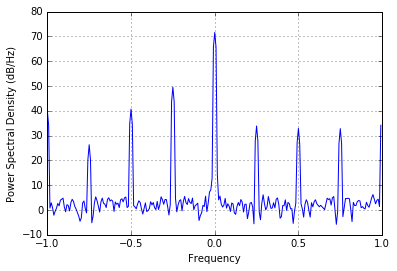

In [32]:
_=psd(d[:,1])

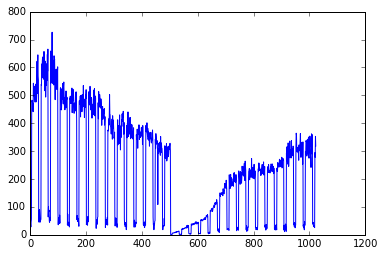

In [33]:
plot(d.std(0))

In [45]:
ri._window_response(.5)

1.599024474555831

In [46]:
200/80.

2.5

In [34]:
fa = np.fft.fft(d,axis=0)

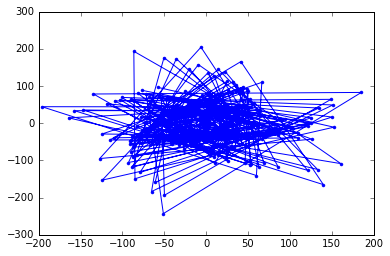

In [33]:
plot_ri(d.mean(0),'.-')

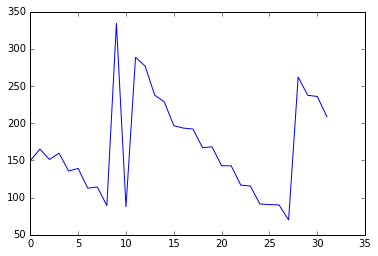

In [57]:
plot(np.abs(d.mean(0))[:32])

In [13]:
ri.nfft//2

8192

In [276]:
d.shape

(1024, 1)

In [272]:
ri.fft_bins

array([[7880]])

In [274]:
(2*ri.tone_bins*2**14-ri.fft_bins*2**18)/2.**18

array([[-0.125]])

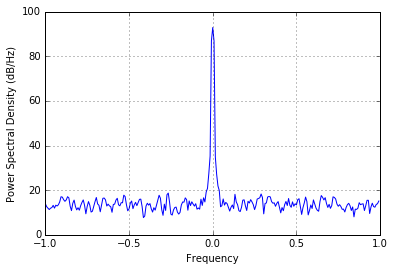

In [280]:
_=psd(d[:,0]*np.exp(2j*np.pi*-0.125*np.arange(1024)))

In [219]:
fa = (np.fft.fft(d.reshape((-1,16,1024)),axis=1)).mean(0)

In [220]:
fa.shape

(16, 1024)

In [221]:
amax = np.abs(fa).argmax(0)

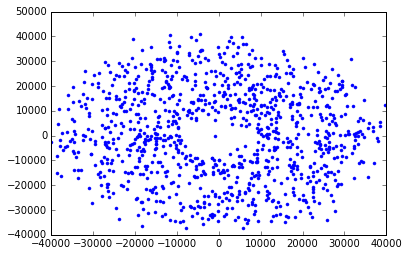

In [222]:
plot_ri(fa[amax,np.arange(1024,dtype='int')],'.')

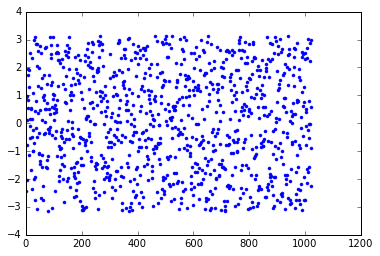

In [224]:
plot(np.angle(np.exp(-1j*ri.phases)*np.fft.fftshift(fa[amax,np.arange(1024,dtype='int')])),'.')

In [121]:
4096/512.

8.0

In [122]:
2**18/2**15

8

In [155]:
ri.tone_bins.shape

(1, 512)

(0, 20)

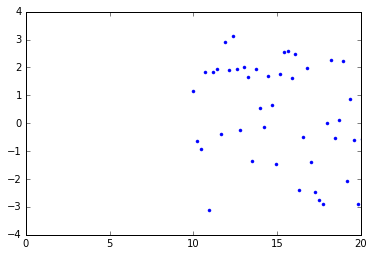

In [195]:
plot(frqs,np.angle(np.exp(-1j*ri.phases)*fa[np.abs(fa).argmax(0),np.arange(1024,dtype='int')]),'.')
xlim(0,20)

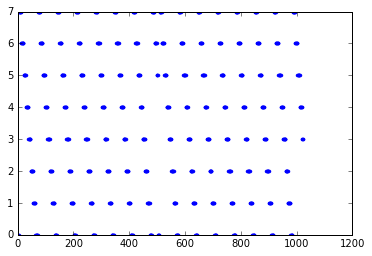

In [194]:
plot(np.abs(fa).argmax(0)/128.,'.')

In [65]:
ri.hardware_delay_estimate

-6.33e-05

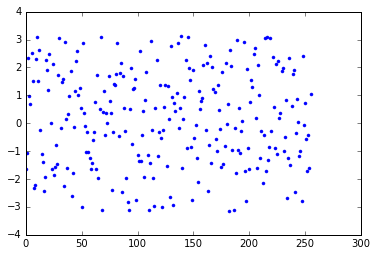

In [85]:
plot(np.angle(d.mean(0)),'.')

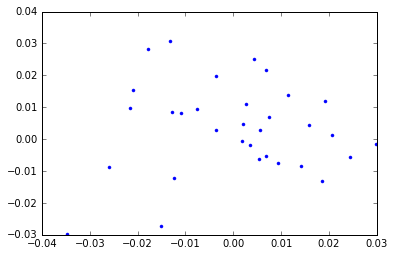

In [89]:
_=plot_ri(d.mean(0),'.')

In [10]:
from kid_readout.roach import r2_udp_catcher

In [11]:
pkts = r2_udp_catcher.get_udp_packets(ri,16)

In [12]:
np.diff([np.frombuffer(pkt,dtype='uint32')[-1] for pkt in pkts])

array([16777216, 16777216, 16777216, 16777216, 16777216, 16777216,
       16777216, 16777216, 16777216, 16777216, 16777216, 16777216,
       16777216, 16777216, 16777216, 16777216], dtype=uint32)

In [13]:
(2**24)/2**14

1024

In [14]:
2**14*2**10/1.

16777216.0